In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [40]:
df=pd.read_csv('data/stud.csv')
df.shape

(1000, 8)

In [41]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [44]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [45]:
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [46]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [47]:
numericfeature=[features for features in df.columns if df[features].dtype!='O']
categoricalfeature=[features for features in df.columns if df[features].dtype=='O']
print(len(numericfeature))
print(len(categoricalfeature))


3
5


In [48]:
df['totalscore']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['totalscore']/3
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   totalscore    average  
0         218  72.666667  
1         247  82.333333  
2         278  92.666667  
3         148  49.333333  
4         229  76.333333

In [49]:
readingfull=df[df['reading_score']==100]['average'].count()
writingfull=df[df['writing_score']==100]['average'].count()
mathfull=df[df['math_score']==100]['average'].count()

In [50]:
readingless20=df[df['reading_score']<=20]['average'].count()
writingless20=df[df['writing_score']<=20]['average'].count()
mathless20=df[df['math_score']<=20]['average'].count()
readingless20

1

In [51]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

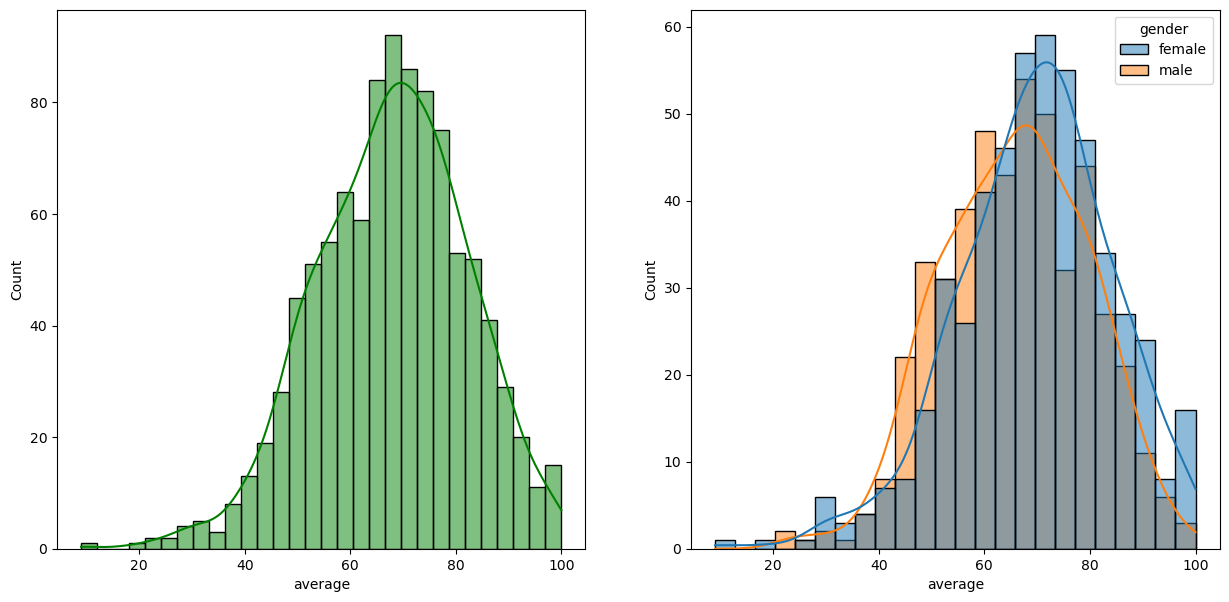

In [52]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

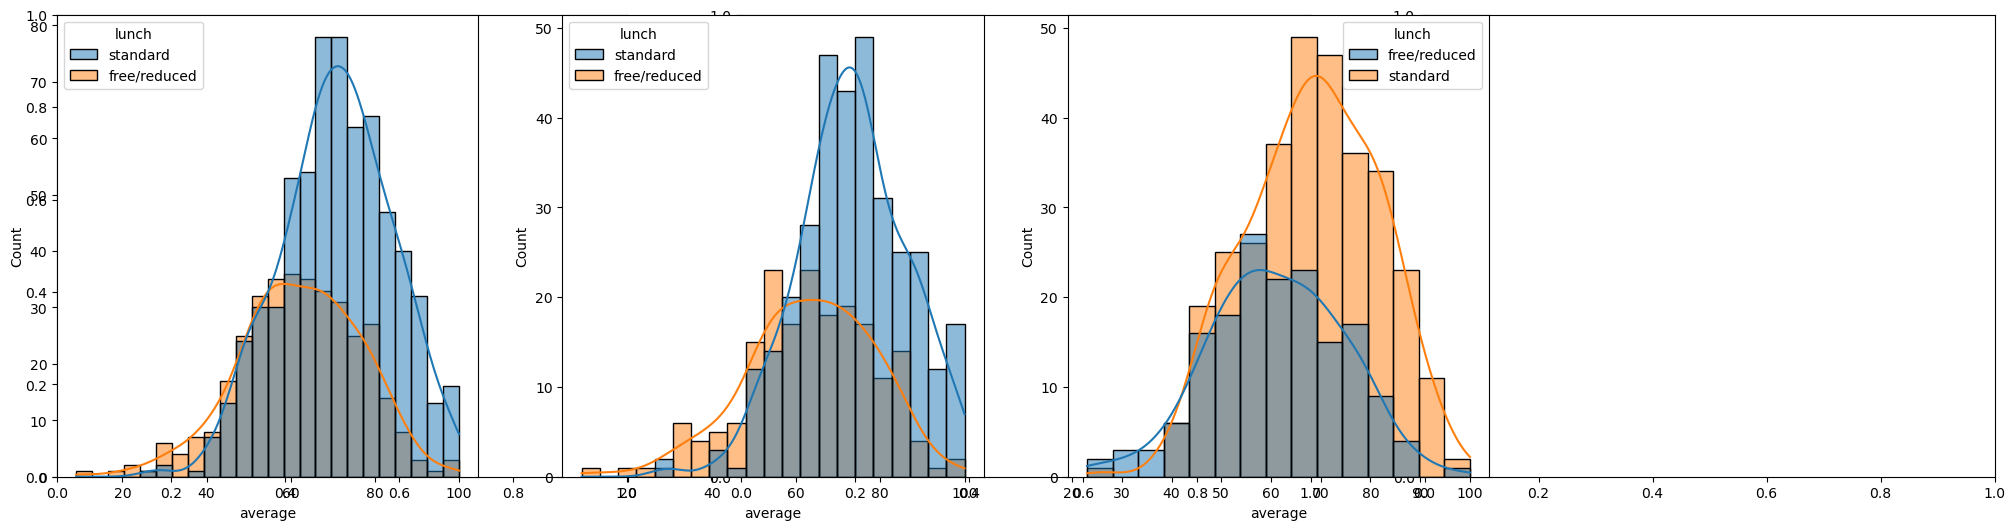

In [53]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


In [54]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   totalscore    average  
0         218  72.666667  
1         247  82.333333  
2         278  92.666667  
3         148  49.333333  
4         229  76.333333

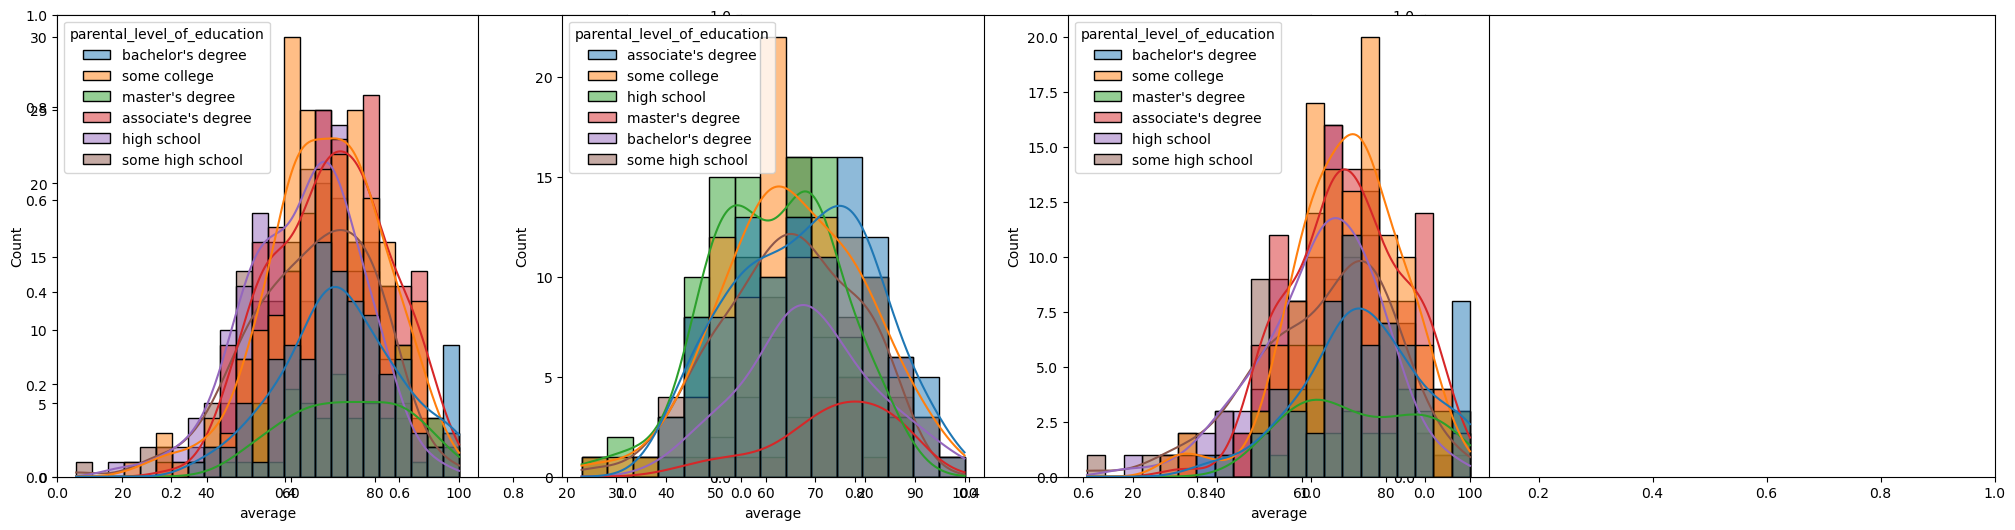

In [55]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [56]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

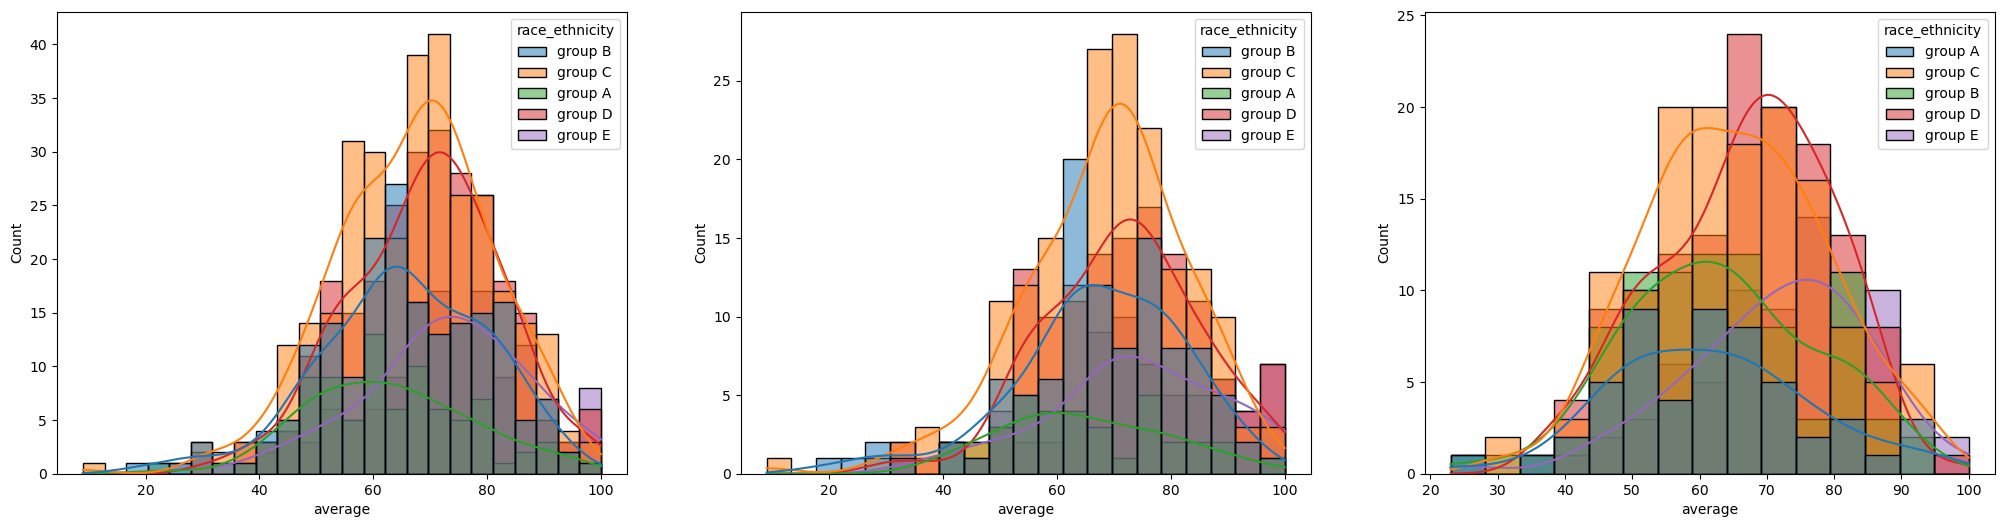

In [57]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

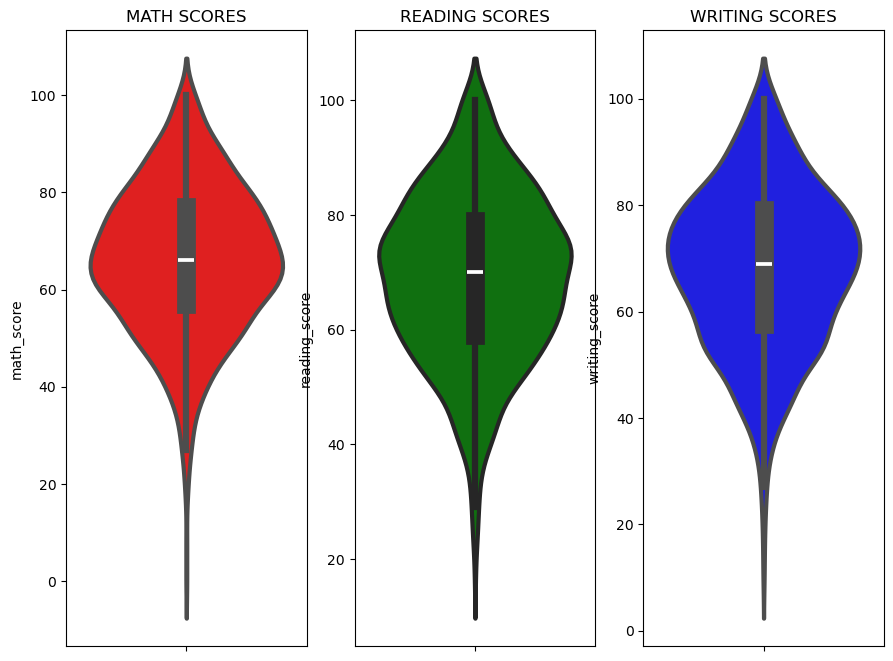

In [58]:
plt.figure(figsize=(18,8))
plt.subplot(1, 5, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 5, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 5, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

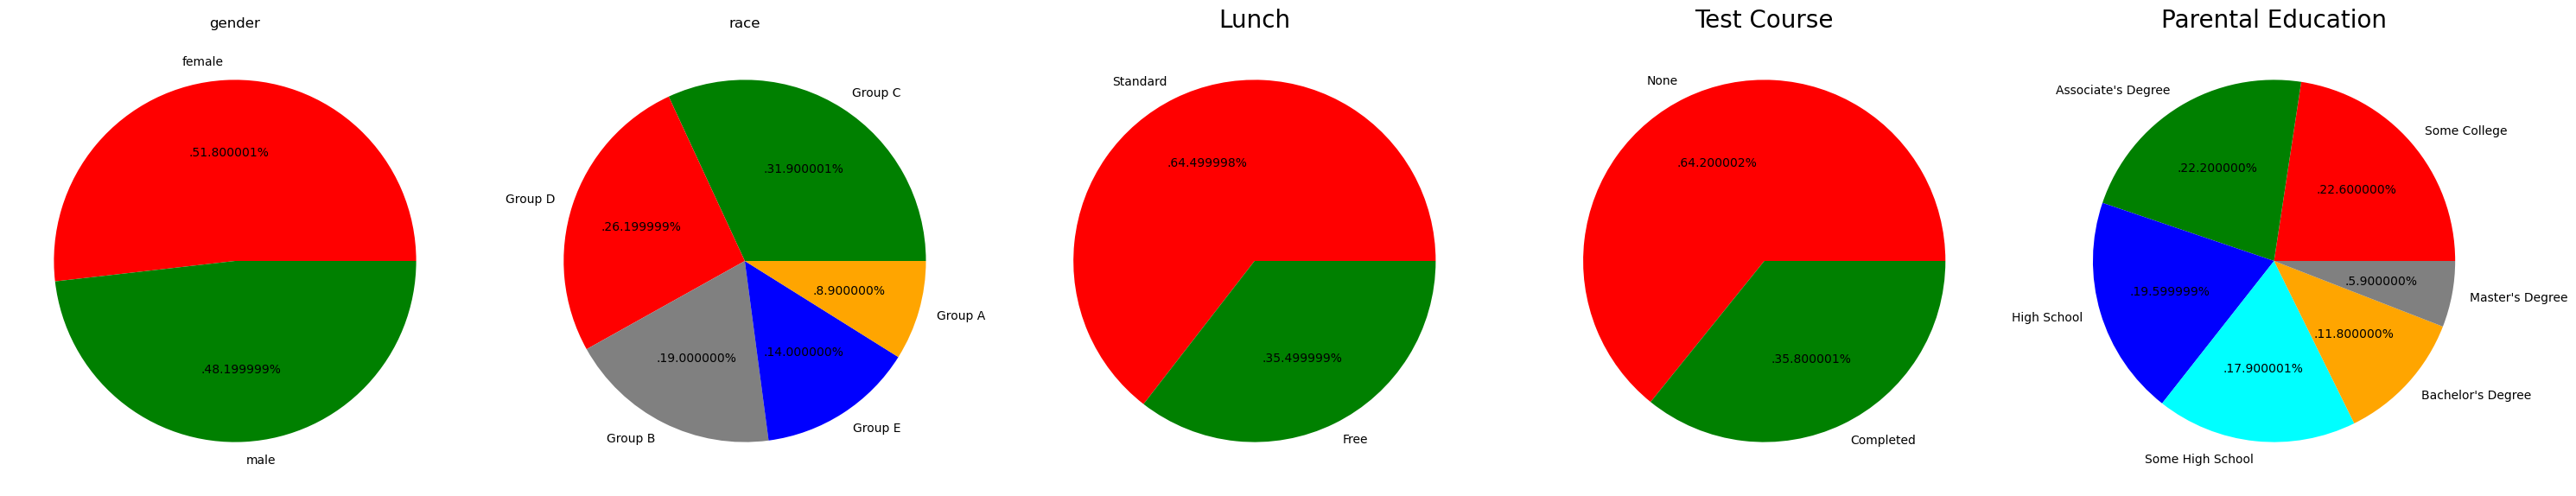

In [59]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='female','male'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("gender")
plt.axis('off')
plt.subplot(1,5,2)
plt.pie(df['race_ethnicity'].value_counts(),colors=['green','red','grey','blue','orange'],labels=['Group C', 'Group D','Group B','Group E','Group A'],autopct='.%2f%%')
plt.title('race')
plt.axis('off')
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

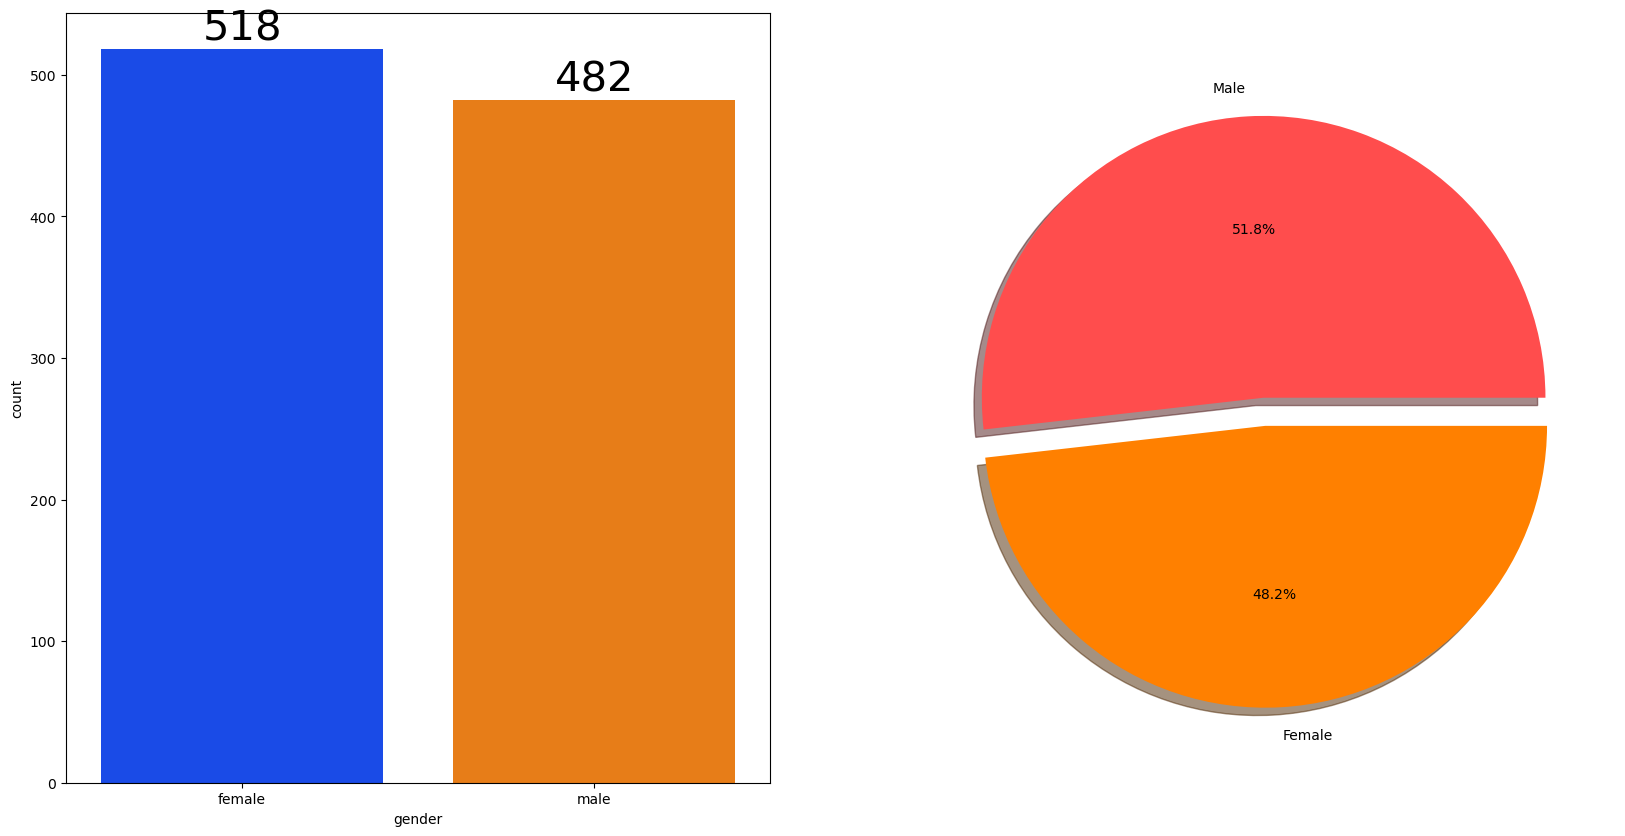

In [60]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.81)
for e in ax[0].containers:
    ax[0].bar_label(e,color='black',size=30)

    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


In [61]:
gg=df.groupby('gender')
mg=gg['math_score'].mean()
mg
ag=gg['average'].mean()
ag

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

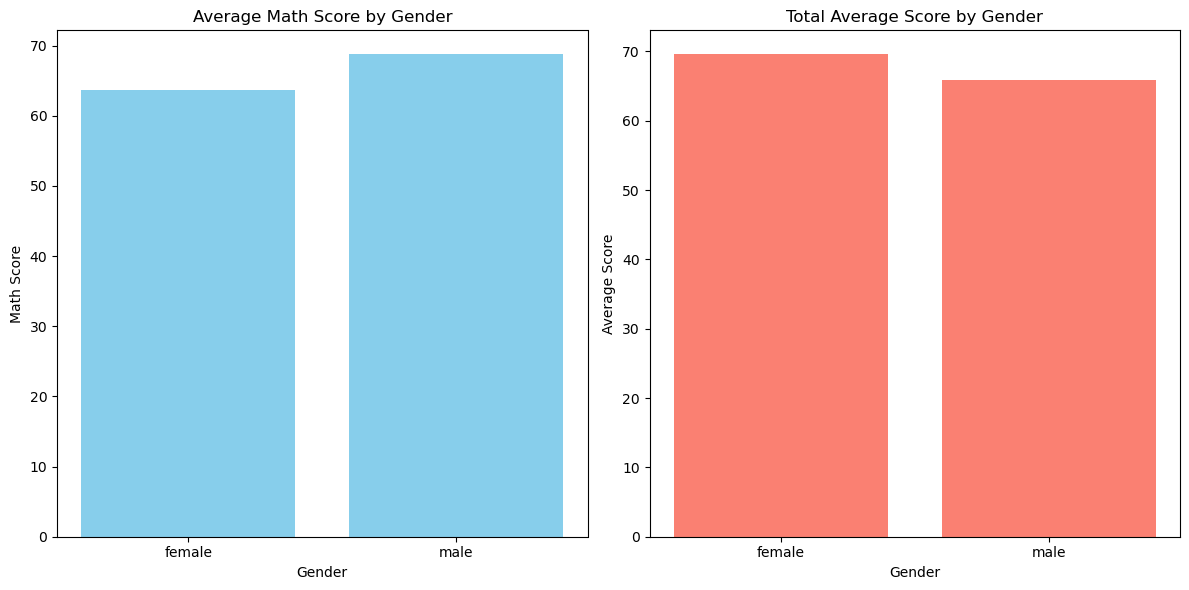

In [62]:
import matplotlib.pyplot as plt

# Assuming mg and ag are Series with gender as index
plt.figure(figsize=(12, 6))

# Plot Math Score Mean
plt.subplot(1, 2, 1)
plt.bar(mg.index, mg.values, color='skyblue')
plt.title('Average Math Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')

# Plot Total Average Score
plt.subplot(1, 2, 2)
plt.bar(ag.index, ag.values, color='salmon')
plt.title('Total Average Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')

plt.tight_layout()
plt.show()


([<matplotlib.patches.Wedge at 0x2b27416db80>,
 [Text(0.06647087934253791, 1.0979898096974443, 'male'),
  Text(-0.0664708793425383, -1.0979898096974443, 'female')])

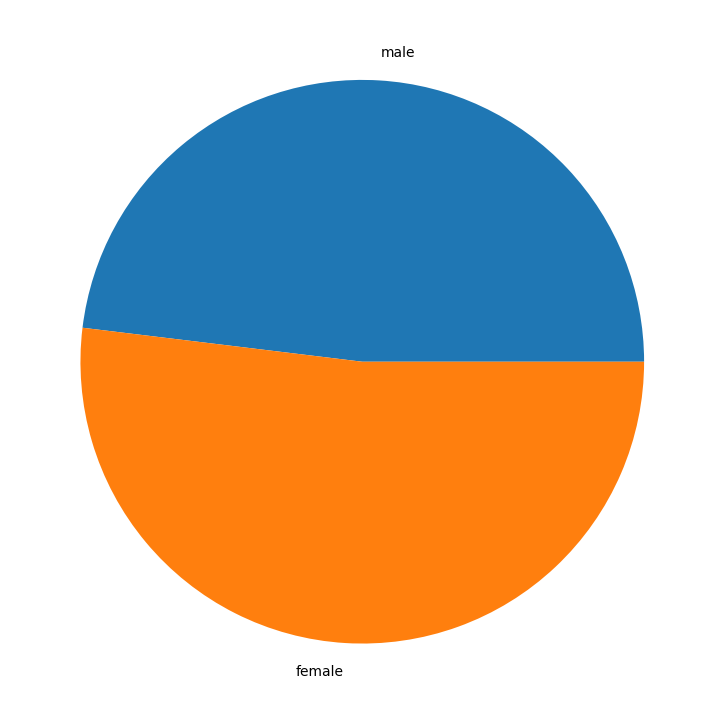

In [63]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.pie(mg.values,labels=['male','female'])

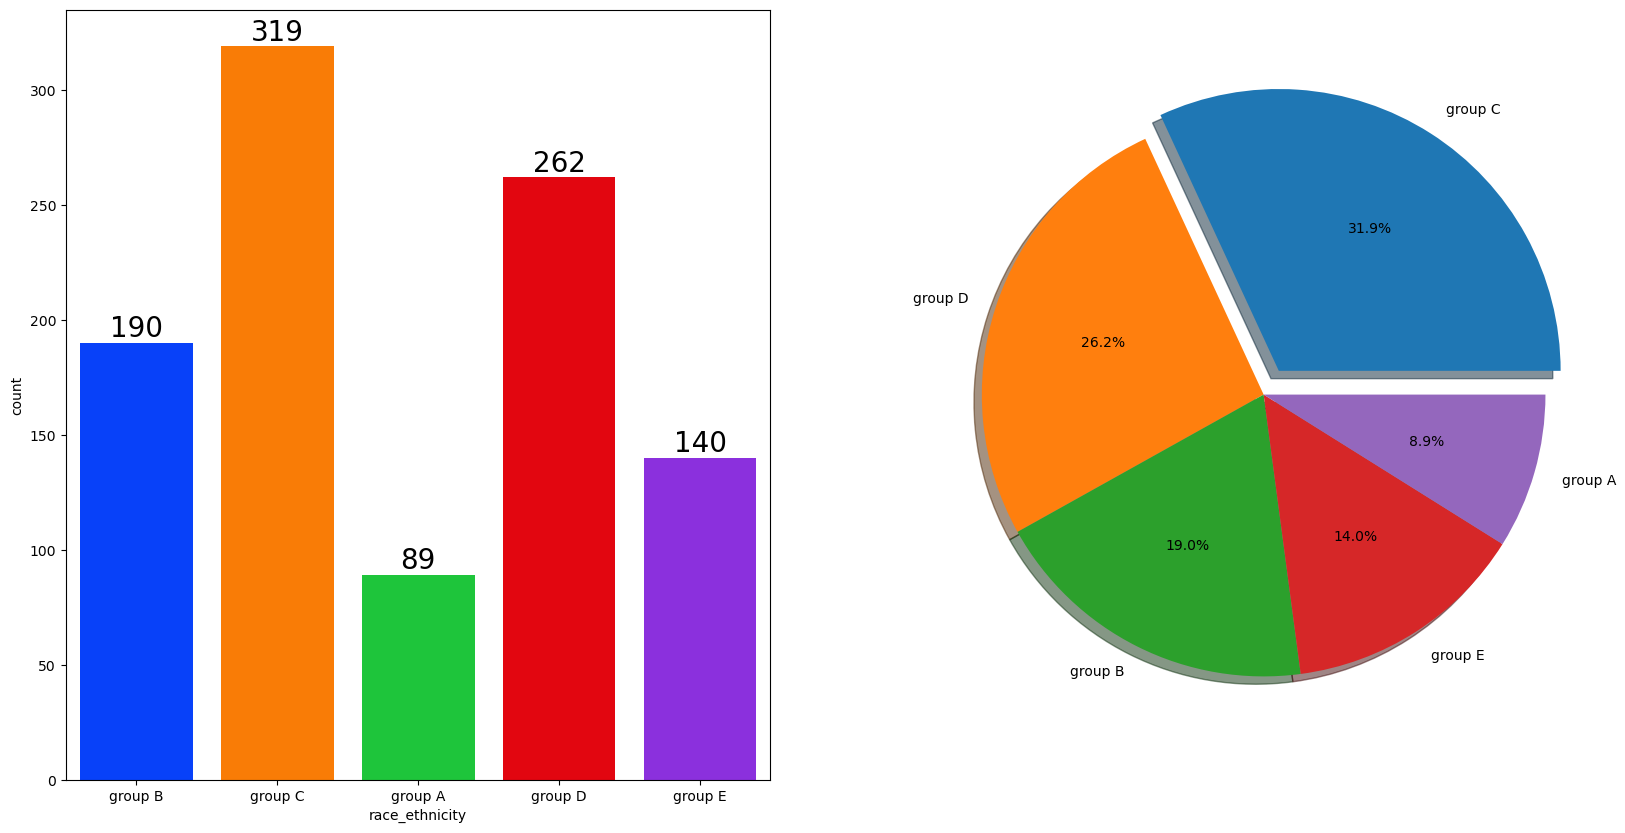

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

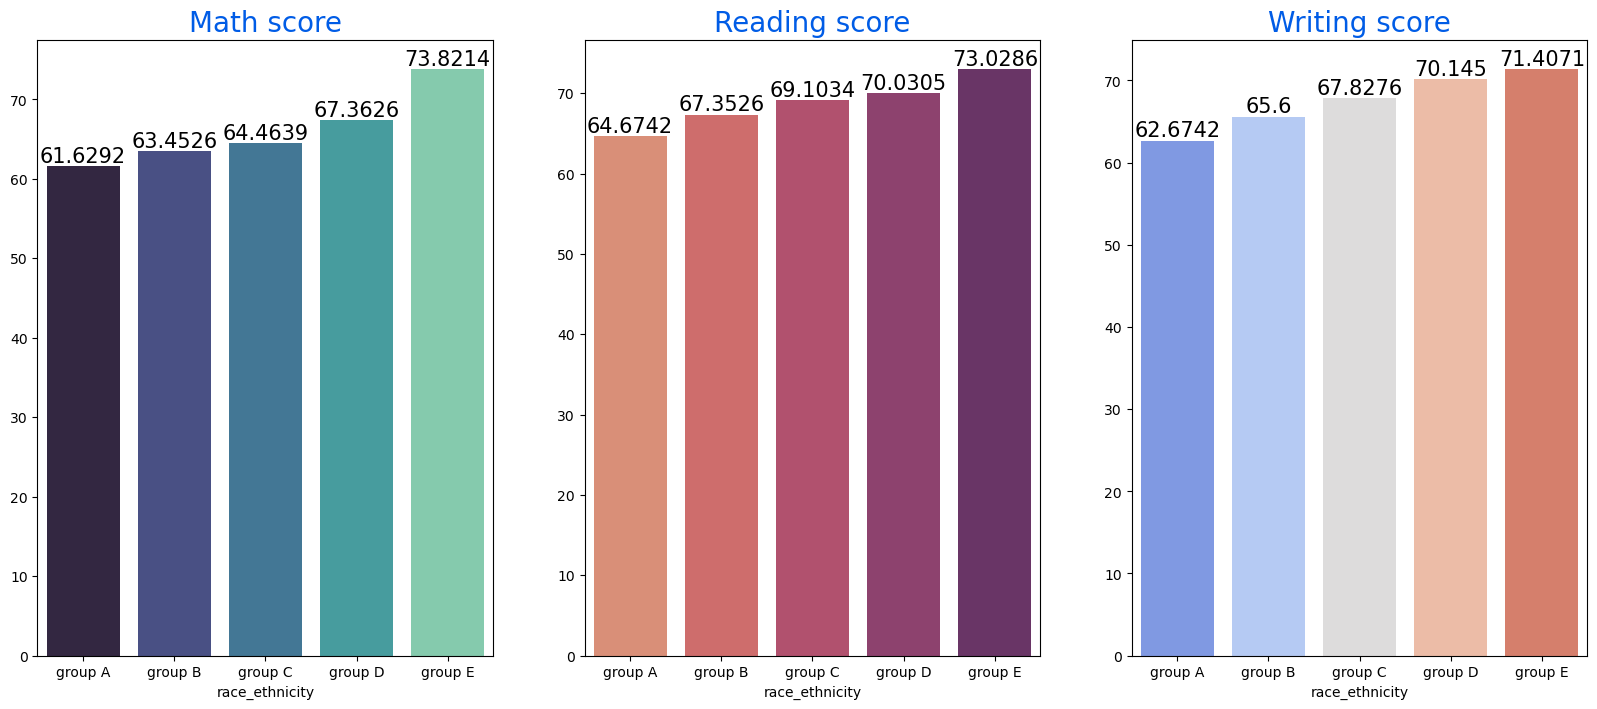

In [65]:
gd=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=gd['math_score'].mean().index,y=gd['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
sns.barplot(x=gd['reading_score'].mean().index,y=gd['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=gd['writing_score'].mean().index,y=gd['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

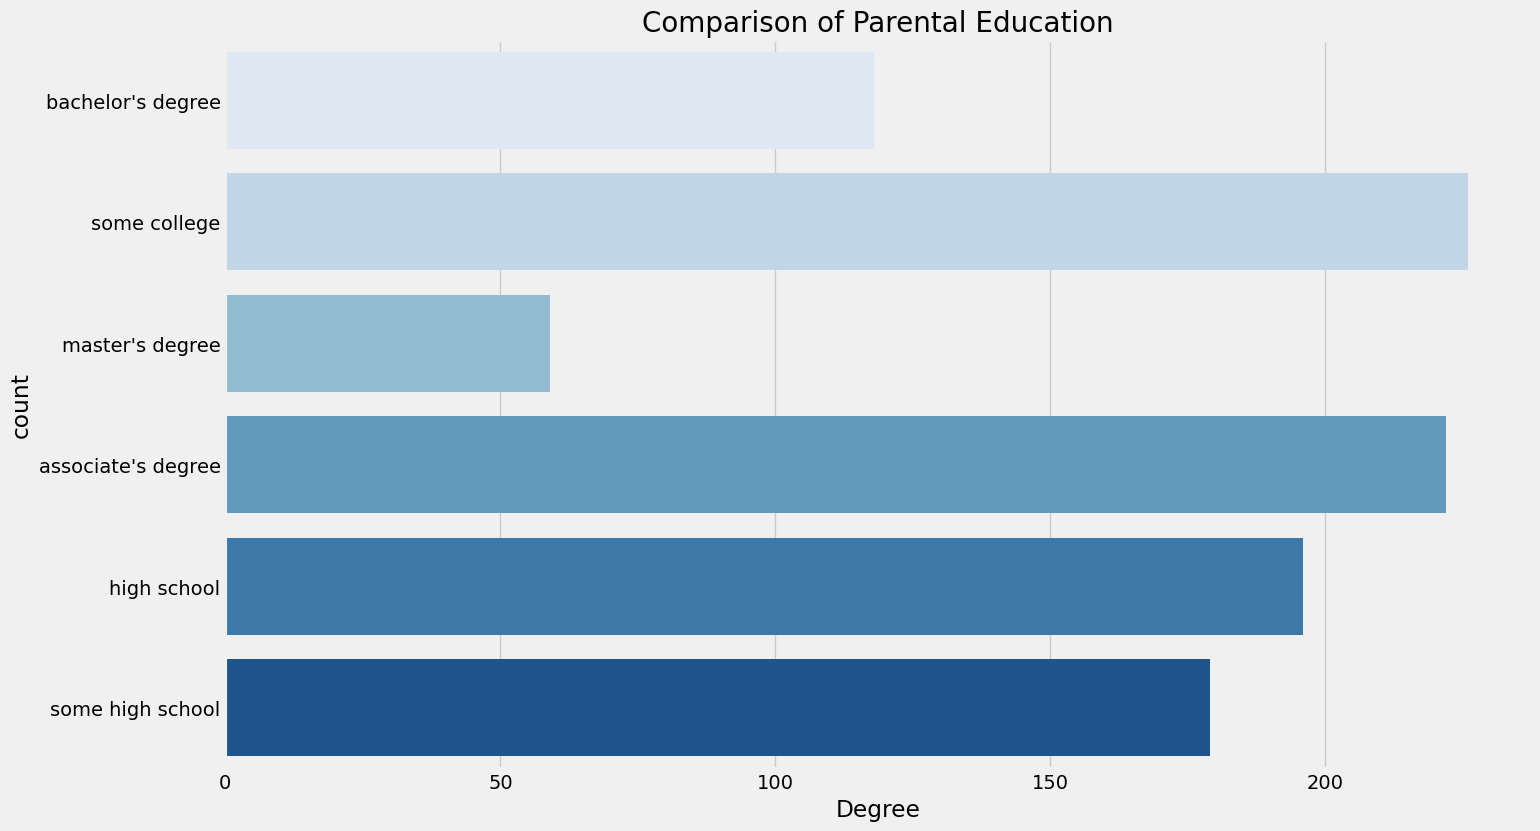

In [66]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [67]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

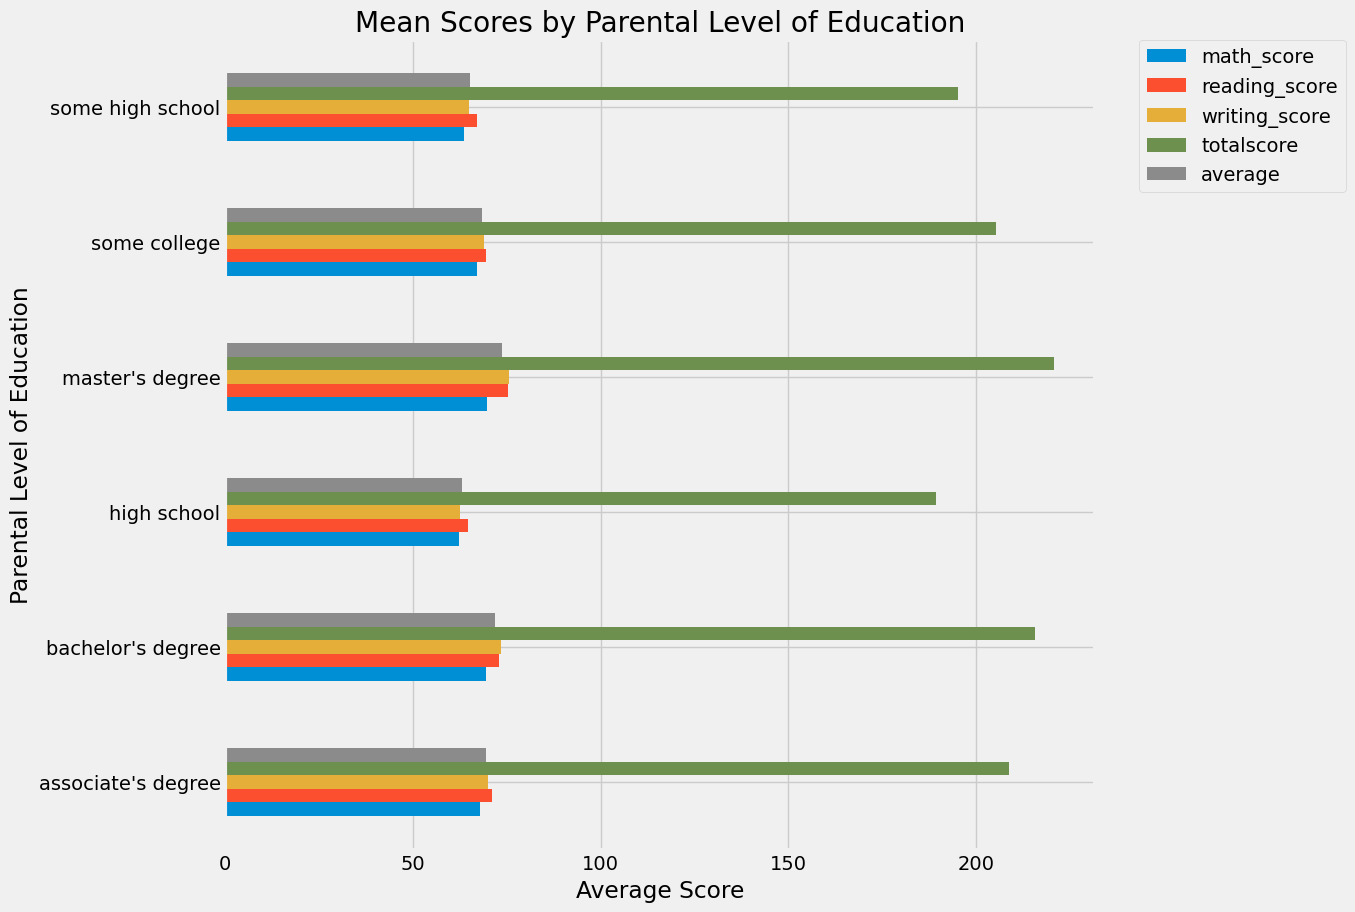

In [68]:
# df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()
# Select only numeric columns and group by parental level of education
df_numeric = df.select_dtypes(include='number')

# Group and compute mean
grouped = df.groupby('parental_level_of_education')[df_numeric.columns].mean()

# Plot
grouped.plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.title("Mean Scores by Parental Level of Education")
plt.xlabel("Average Score")
plt.ylabel("Parental Level of Education")
plt.show()


In [69]:
df_numeric = df.select_dtypes(include='number')
df_numeric

math_score  reading_score  writing_score  totalscore    average
0            72             72             74         218  72.666667
1            69             90             88         247  82.333333
2            90             95             93         278  92.666667
3            47             57             44         148  49.333333
4            76             78             75         229  76.333333
..          ...            ...            ...         ...        ...
995          88             99             95         282  94.000000
996          62             55             55         172  57.333333
997          59             71             65         195  65.000000
998          68             78             77         223  74.333333
999          77             86             86         249  83.000000

[1000 rows x 5 columns]

<Axes: xlabel='count', ylabel='lunch'>

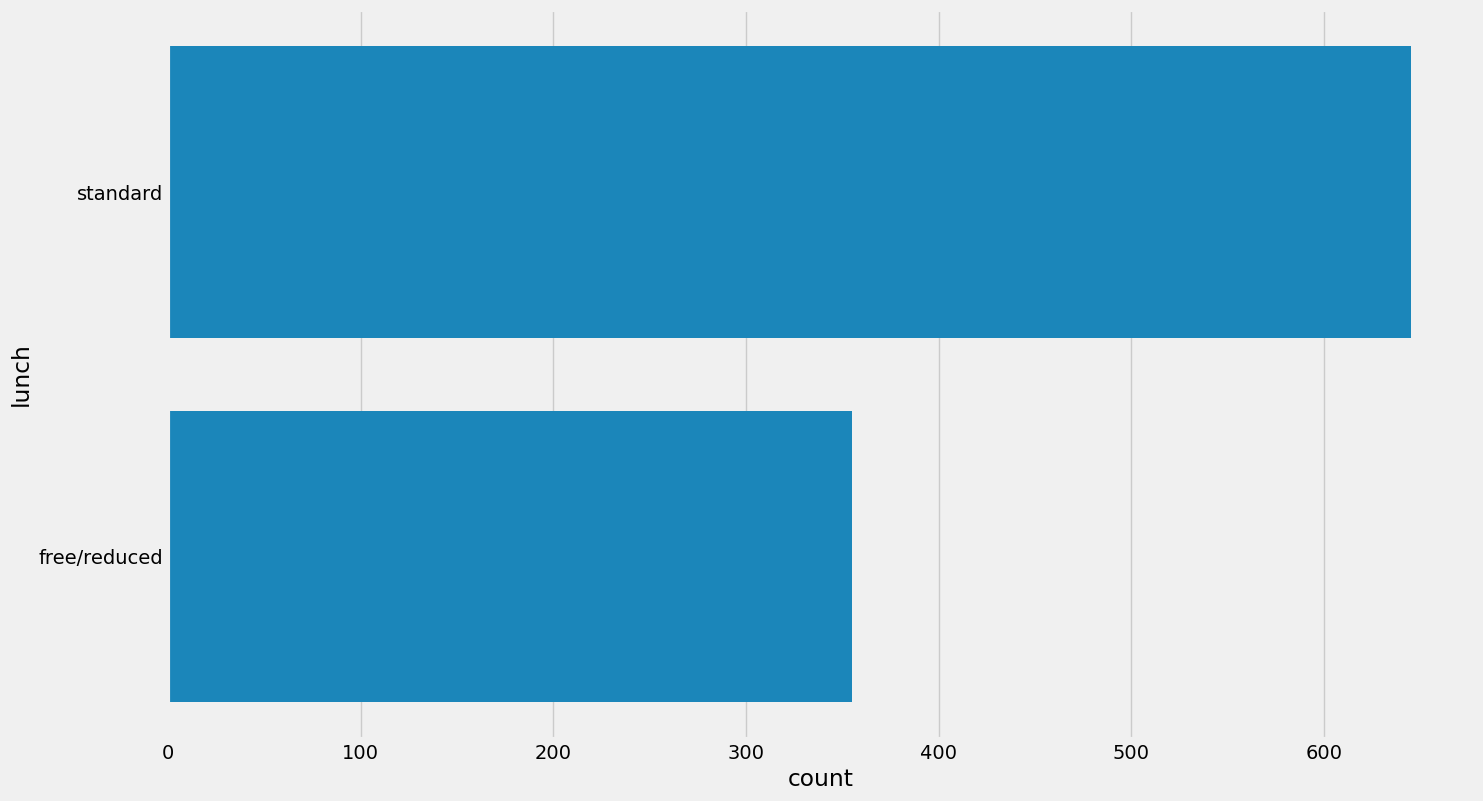

In [70]:
sns.countplot(df['lunch'])

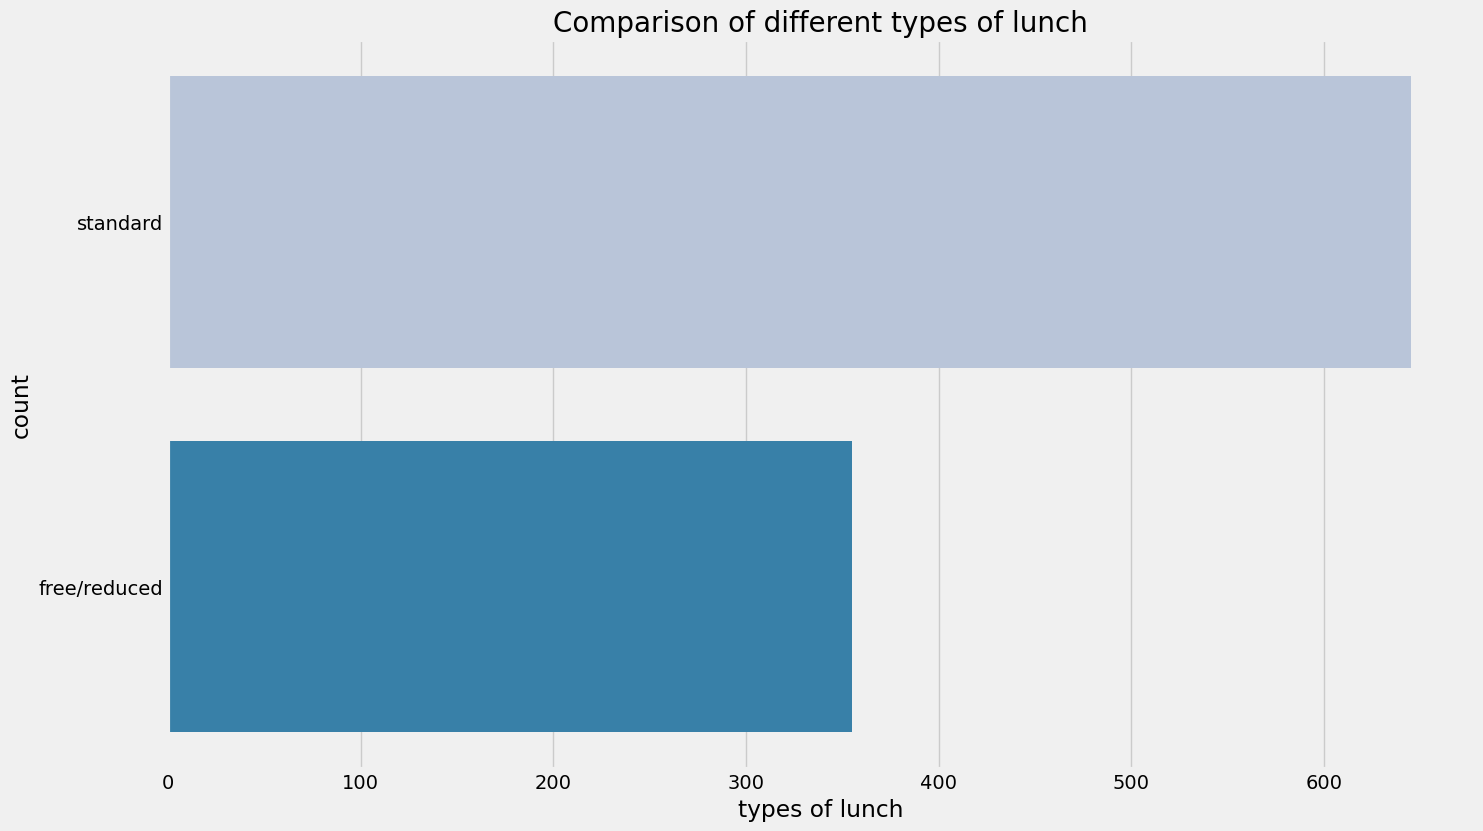

In [71]:
plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

<Axes: xlabel='test_preparation_course'>

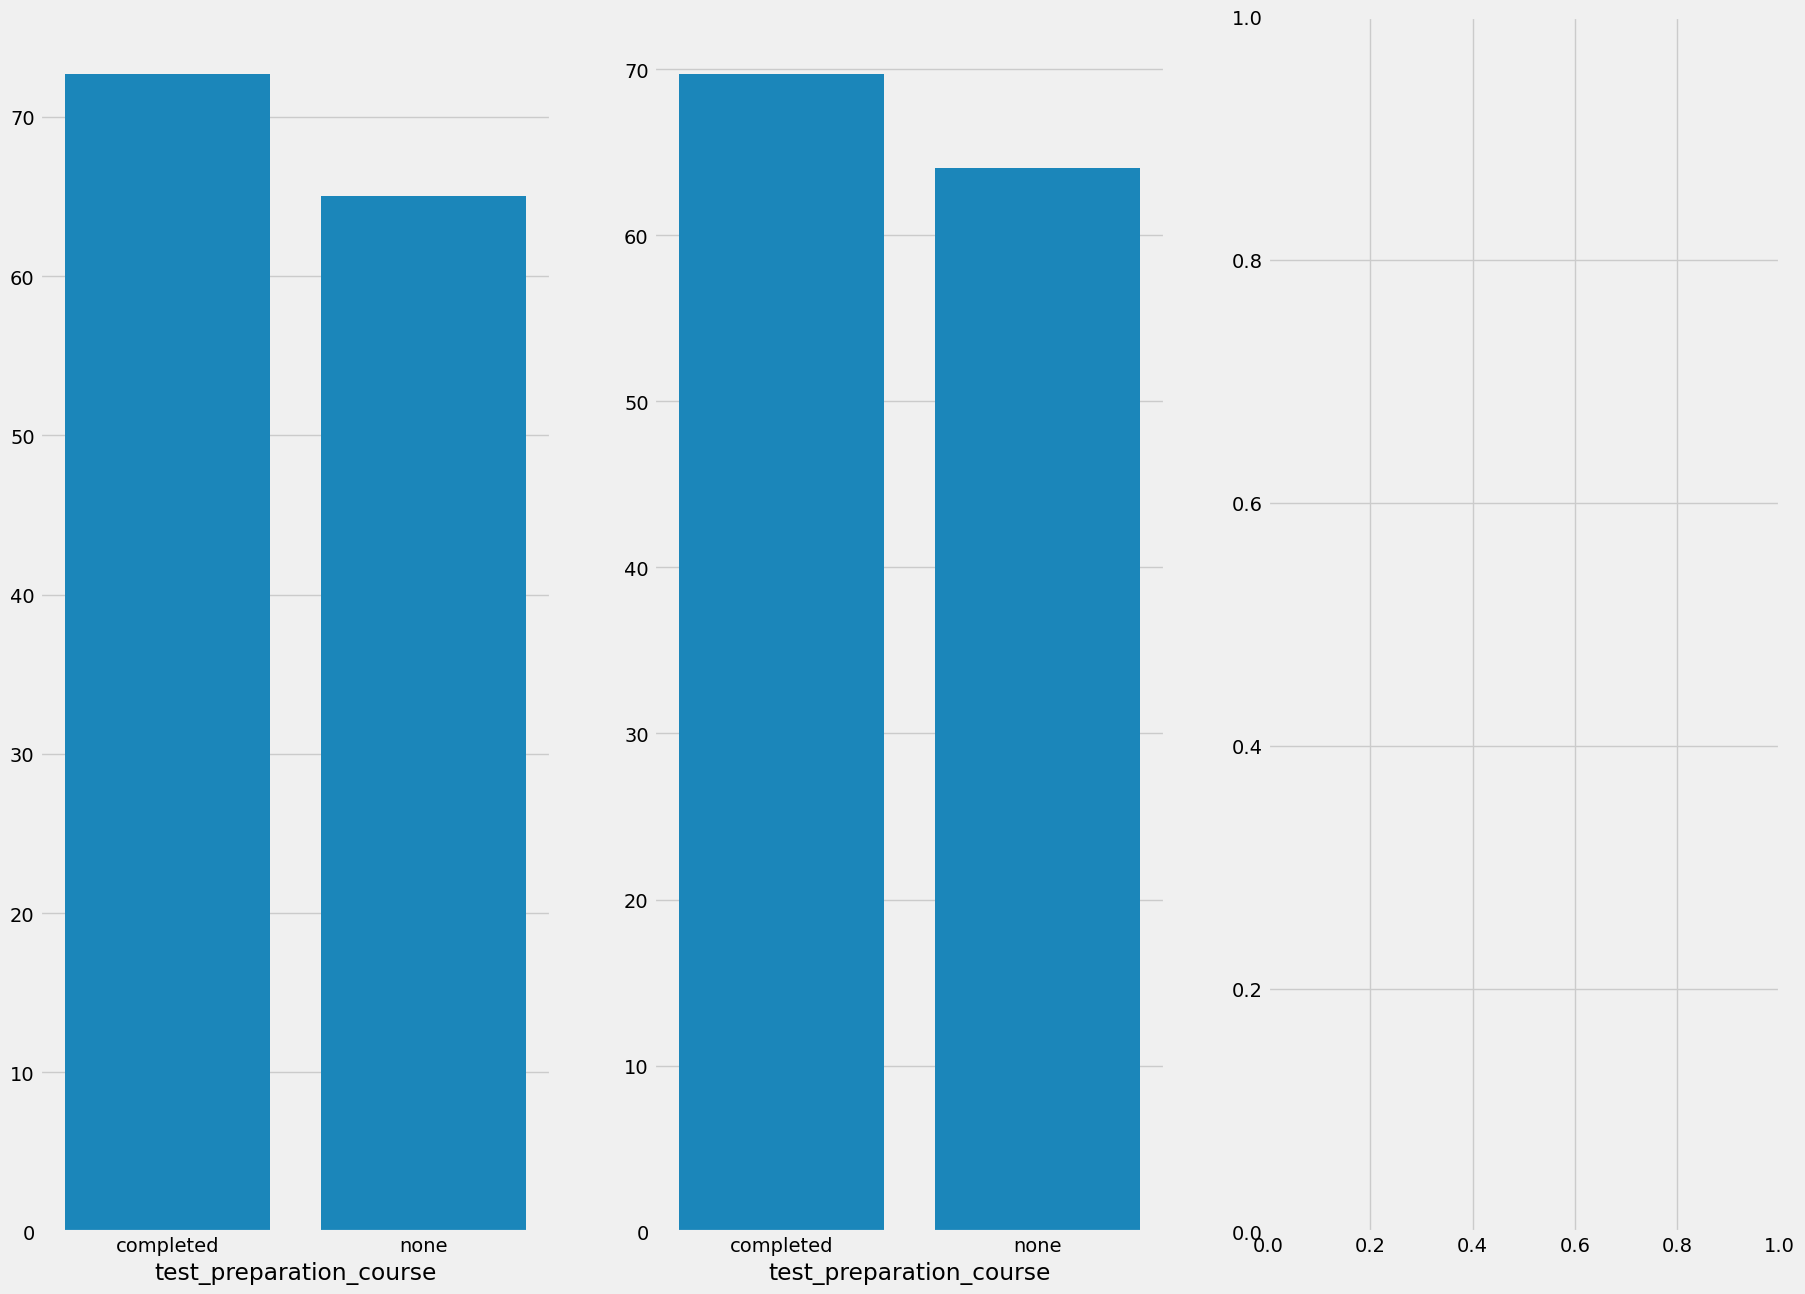

In [72]:
gd=df.groupby('test_preparation_course')
f,ax=plt.subplots(1,3,figsize=(20,15))
sns.barplot(x=gd['average'].mean().index,y=gd['average'].mean().values,ax=ax[0])
sns.barplot(x=gd['math_score'].mean().index,y=gd['math_score'].mean().values,ax=ax[1])

In [73]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

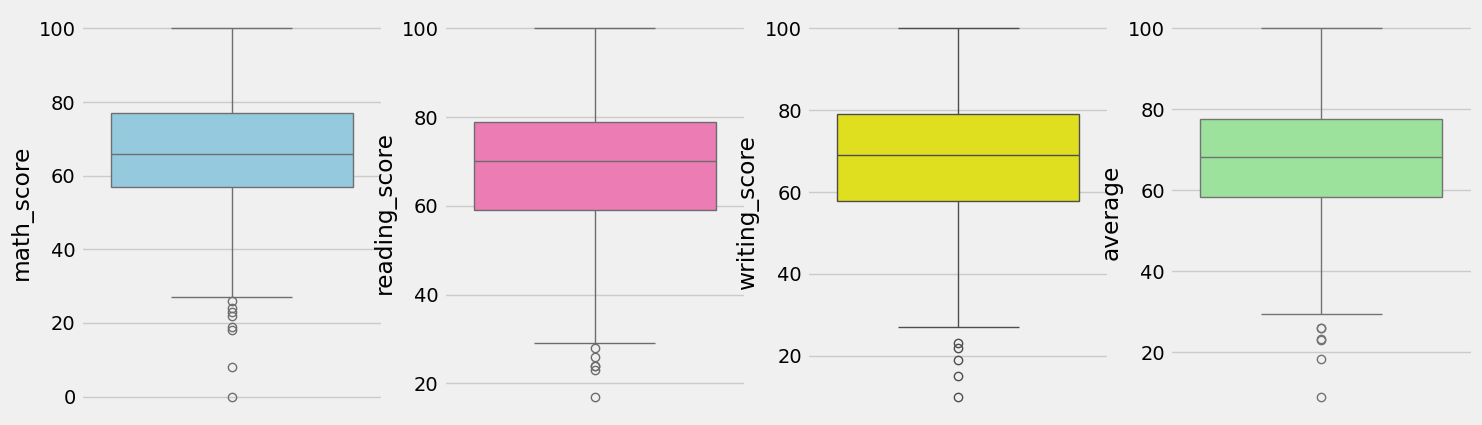

In [74]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

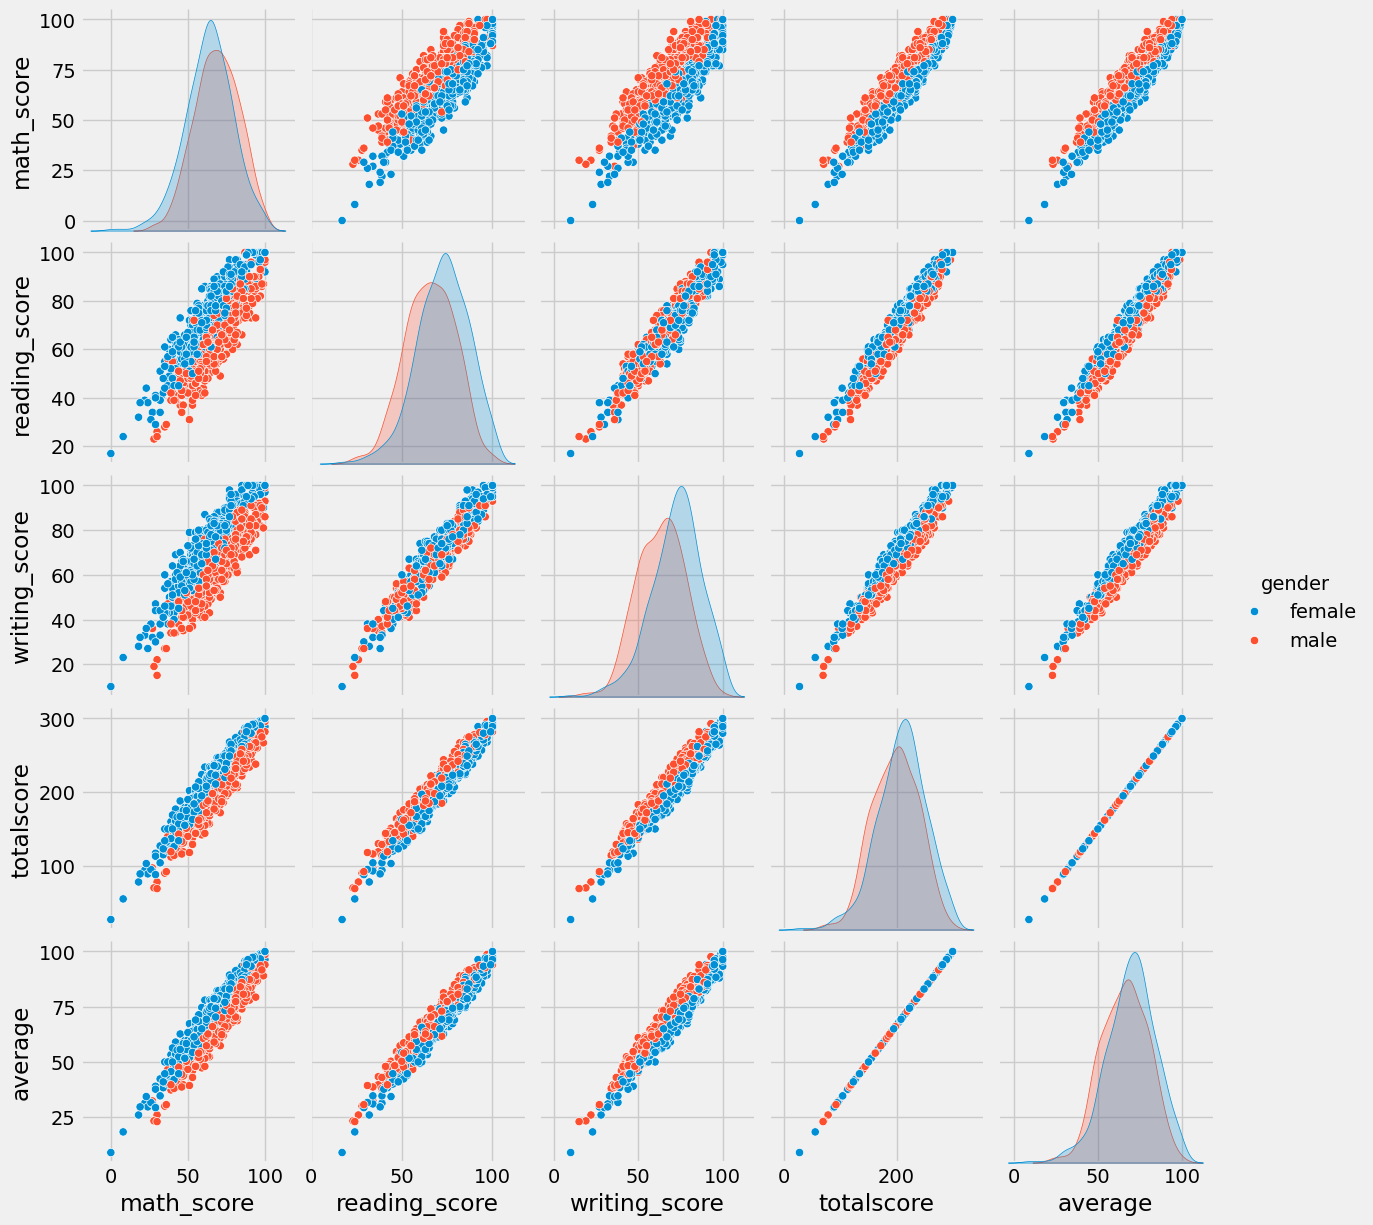

In [75]:
sns.pairplot(df,hue = 'gender')
plt.show()

In [76]:
n=5
for i in range(5,0,-1):
    print(" "*(n-i)+"#"*i)
for i in range(1,6,1):
    print("#"*i)

#####
 ####
  ###
   ##
    #
#
##
###
####
#####


In [77]:
n=7
mid=(n//2)+1
for i in range(1,n+1):
    # if(i==(i//2)+1):
    #     print("#"*n)

    if(i==1 or i==n or i==mid):
        print("#"*n)
    else:
        print("#"+" "*(n-2)+"#")

#######
#     #
#     #
#######
#     #
#     #
#######


In [ ]:
x=int(input("tel the no"))
sum=0
for i in range(1,x+1):
    sum=sum+i
print(sum)


15


In [14]:
nn=int(input("enter the nn"))
x=[]
for i in range(0,nn):
    c=int(input("enter the n"))
    x.append(c)
print(x)
max=x[0]

for w in range(0,nn):
    if x[w]>max:
        max=x[w]
print(max)

[36, 3, 6, 58, 6, 3]
58


In [24]:
n=int(input("enter a number: "))
def p(n):
    if n%2==0:
        print("not p")
    elif n==1 or n==0:
        print("10")
    else:
        for i in range(3,n):
            if n%i==0:
                print("not")
                return
                
            
        print("prime")


p(n)    

not


In [34]:
x=input("neter")
print(x)
for i in range(len(x),0,-1):
    print(x[i-1],end="")

cdvg
gvdc

In [ ]:
x=int(input("enter a num "))
a,b=0,1
for _ in range(n):
    
    

720


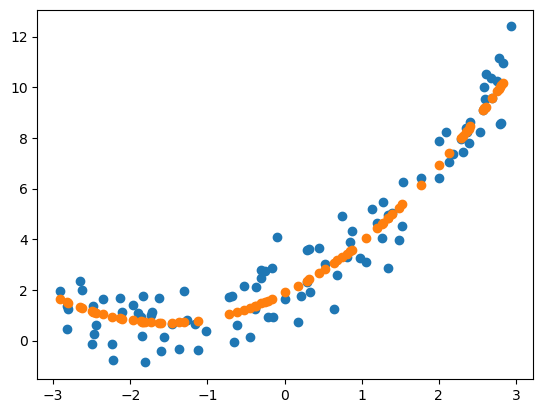

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x=6*np.random.rand(100,1)-3
y=0.5*x**2+1.5*x+2+np.random.randn(100,1)
plt.scatter(x,y)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=42)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)
from sklearn.metrics import r2_score
score=r2_score(ytest,reg.predict(xtest))
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
xtp=poly.fit_transform(xtrain)
xtep=poly.transform(xtrain)
reg.fit(xtp,ytrain)
yp=reg.predict(xtep)
plt.scatter(xtrain,reg.predict(xtp))

In [2]:
import array as arr
x=arr.array('i',[1,2,3,4,5])
print(list(x))

[1, 2, 3, 4, 5]


In [ ]:
arr = [1, 2, 3, 4, 5]


[4, 5]


In [13]:
d=[1,2,3,4,5]
p=5
if p in d:
    print("u")
else:
    print("o")


u


In [14]:

# First matrix
A = [
    [1, 2, 3],
    [4, 5, 6]
]
len(A)

2

In [26]:
# Take matrix input from user

# Step 1: Get rows and columns
rows = int(input("Enter number of rows: "))
cols = int(input("Enter number of columns: "))

# Step 2: Initialize matrix
matrix = []

print("Enter the elements row-wise:")

# Step 3: Take row-wise input
for i in range(rows):
    row = list(map(int, input().split()))
    while len(row) != cols:
        print(f"Please enter exactly {cols} values for row {i+1}:")
        row = list(map(int, input().split()))
    matrix.append(row)

# Step 4: Display the matrix
print("\nMatrix is:")
for r in matrix:
    print(r)


Enter the elements row-wise:

Matrix is:
[1, 2, 3]
[1, 5, 6]
[1, 4, 8]


In [27]:
# Step 1: Get rows and columns
rows = int(input("Enter number of rows: "))
cols = int(input("Enter number of columns: "))

# Step 2: Initialize matrix
matrix = []

# Step 3: Take input element-by-element
print("Enter the elements one-by-one:")
for i in range(rows):
    row = []
    for j in range(cols):
        val = int(input(f"Enter element at position ({i+1},{j+1}): "))
        row.append(val)
    matrix.append(row)

# Step 4: Display the matrix
print("\nMatrix is:")
for r in matrix:
    print(r)


Enter the elements one-by-one:

Matrix is:
[1, 2, 3]
[3, 5, 6]
[13, 15, 56]


In [29]:
r=int(input("enter the no of rows "))
c=int(input("enter the no of columns "))
matrix=[]
for i in range(r):
    ro=[]
    for j in range(c):
        n=int(input("enter the num : "))
        ro.append(n)
    matrix.append(ro)
print(matrix)


[[23, 23, 56], [63, 52, 14], [25, 63, 23]]


In [38]:
x=[]
for _ in range(2):
    r=int(input("enter the no of rows "))
    c=int(input("enter the no of columns "))
    matrix=[]
    for i in range(r):
        ro=[]
        for j in range(c):
            n=int(input("enter the num : "))
            ro.append(n)
        matrix.append(ro)
    x.append(matrix)
    
print(x)
    

[[[3, 6], [5, 2]], [[3, 6], [5, 2]]]


In [39]:
x = []

# Input two matrices
for k in range(2):
    r = int(input(f"Enter the number of rows for matrix {k+1}: "))
    c = int(input(f"Enter the number of columns for matrix {k+1}: "))
    matrix = []
    for i in range(r):
        row = []
        for j in range(c):
            n = int(input(f"Enter element ({i+1},{j+1}) for matrix {k+1}: "))
            row.append(n)
        matrix.append(row)
    x.append(matrix)

# Extract matrices
A = x[0]
B = x[1]

# Check if multiplication is possible
if len(A[0]) != len(B):
    print("Matrix multiplication not possible! (Columns of A != Rows of B)")
else:
    # Initialize result matrix with zeros
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    
    # Perform multiplication
    for i in range(len(A)):            # Rows of A
        for j in range(len(B[0])):     # Columns of B
            for k in range(len(B)):    # Rows of B
                result[i][j] += A[i][k] * B[k][j]

    # Output
    print("Matrix A:", A)
    print("Matrix B:", B)
    print("Result of multiplication:", result)


Matrix A: [[3, 6], [3, 2]]
Matrix B: [[6, 5], [3, 2]]
Result of multiplication: [[36, 27], [24, 19]]


In [ ]:
m=[]
for k in range(2):
    r=int(input("enter the no of rows : "))
    c=int(input("enter the no of c "))
    matrix=[]
    for i in range(r):
        row=[]
        for j in range(c):
            n=int(input("enter the ele "))
            row.append(n)
        matrix.append(row)
    m.append(matrix)
m1=m[0]
m2=m[1]
result=[]
if len(m1[0]) != len(m2):
    print("Matrix multiplication not possible! (Columns of A != Rows of B)")
else:
    result=[[0 for _ in range(len(m2))]]
    

[[3, 6], [3, 2]]
[[3, 6], [3, 2]]


In [1]:
def count(n):
    if n==0:
        print("break")
    else:
        print(n)
        count(n-1)
count(5)

5
4
3
2
1
break


In [2]:
def fact(n):
    if n==0:
        return 1
    else:
        return n*fact(n-1)
fact(5)

120

In [3]:
def summ(n):
    if n==0:
        return 0
    else:
        return n+summ(n-1)
summ(5)

15

In [5]:
def fibo(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    else:
        return fibo(n-1)+fibo(n-2)
fibo(7)

13

In [9]:
def sod(n):
    if n<10:
        return n
    else:
        return n%10+sod(n//10)
sod(998)

26

In [10]:
x="Cdsvfbrtbrd"
for i in range(len(x)):
    print(x[1:-1])

dsvfbrtbr
dsvfbrtbr
dsvfbrtbr
dsvfbrtbr
dsvfbrtbr
dsvfbrtbr
dsvfbrtbr
dsvfbrtbr
dsvfbrtbr
dsvfbrtbr
dsvfbrtbr


In [11]:
def tower_of_hanoi(n, source, target, auxiliary):
    if n == 1:
        print(f"Move disk 1 from {source} to {target}")
        return
    tower_of_hanoi(n - 1, source, auxiliary, target)
    print(f"Move disk {n} from {source} to {target}")
    tower_of_hanoi(n - 1, auxiliary, target, source)

tower_of_hanoi(3, "A", "C", "B")


Move disk 1 from A to C
Move disk 2 from A to B
Move disk 1 from C to B
Move disk 3 from A to C
Move disk 1 from B to A
Move disk 2 from B to C
Move disk 1 from A to C


In [21]:
a = [
    [1, 2, 3],
    [4, 5, 6]
]

# Second matrix
b = [
    [7, 8],
    [9, 10],
    [11, 12]
]
result=[[0 for _ in range(len(b[0]))] for _ in range(len(a))]

for i in range(len(a)):
    
    for j in range(len(b[0])):
        for k in range(len(b)):
            result[i][j]+=a[i][k]*b[k][j]
for r in result:
    print(r)


[58, 64]
[139, 154]
